In [1]:
#importing libraries and dataset
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the given CSV file, and view some sample records
ds = pd.read_excel("HousePricePrediction-1.xlsx")
ds

,Order,Lot_Area,Neighborhood,Bldg_Type,House_Style,Year_Built,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,...,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Cars,Garage_Area,Mo_Sold,Yr_Sold,Building_Age,SalePrice
0,1,31770,NAmes,1Fam,1Story,1960,639.0,0.0,441.0,1080.0,...,3,1,7,2,2.0,528.0,5,2010,50,215000
1,2,11622,NAmes,1Fam,1Story,1961,468.0,144.0,270.0,882.0,...,2,1,5,0,1.0,730.0,6,2010,49,105000
2,3,14267,NAmes,1Fam,1Story,1958,923.0,0.0,406.0,1329.0,...,3,1,6,0,1.0,312.0,6,2010,52,172000
3,4,11160,NAmes,1Fam,1Story,1968,1065.0,0.0,1045.0,2110.0,...,3,1,8,2,2.0,522.0,4,2010,42,244000
4,5,13830,Gilbert,1Fam,2Story,1997,791.0,0.0,137.0,928.0,...,3,1,6,1,2.0,482.0,3,2010,13,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,7937,Mitchel,1Fam,SLvl,1984,819.0,0.0,184.0,1003.0,...,3,1,6,0,2.0,588.0,3,2006,22,142500
2926,2927,8885,Mitchel,1Fam,1Story,1983,301.0,324.0,239.0,864.0,...,2,1,5,0,2.0,484.0,6,2006,23,131000
2927,2928,10441,Mitchel,1Fam,SFoyer,1992,337.0,0.0,575.0,912.0,...,3,1,6,0,0.0,0.0,7,2006,14,132000
2928,2929,10010,Mitchel,1Fam,1Story,1974,1071.0,123.0,195.0,1389.0,...,2,1,6,1,2.0,418.0,4,2006,32,170000


In [2]:
ds.shape

(2930, 26)

In [59]:
ds.describe()

,Order,Lot_Area,Year_Built,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,...,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Cars,Garage_Area,Mo_Sold,Yr_Sold,Building_Age,SalePrice
count,2930.00000,2930.000000,2930.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2928.000000,2928.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,10147.921843,1971.356314,442.629566,49.722431,559.262547,1051.614544,1499.690444,0.431352,0.061134,...,2.854266,1.044369,6.443003,0.599317,1.766815,472.819734,6.216041,2007.790444,36.434130,180796.060068
std,845.96247,7880.017759,30.245361,455.590839,169.168476,439.494153,440.615067,505.508887,0.524820,0.245254,...,0.827731,0.214076,1.572964,0.647921,0.760566,215.046549,2.714492,1.316613,30.291357,79886.692357
min,1.00000,1300.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,-1.000000,12789.000000
25%,733.25000,7440.250000,1954.000000,0.000000,0.000000,219.000000,793.000000,1126.000000,0.000000,0.000000,...,2.000000,1.000000,5.000000,0.000000,1.000000,320.000000,4.000000,2007.000000,7.000000,129500.000000
50%,1465.50000,9436.500000,1973.000000,370.000000,0.000000,466.000000,990.000000,1442.000000,0.000000,0.000000,...,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,6.000000,2008.000000,34.000000,160000.000000
75%,2197.75000,11555.250000,2001.000000,734.000000,0.000000,802.000000,1302.000000,1742.750000,1.000000,0.000000,...,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,8.000000,2009.000000,54.000000,213500.000000
max,2930.00000,215245.000000,2010.000000,5644.000000,1526.000000,2336.000000,6110.000000,5642.000000,3.000000,2.000000,...,8.000000,3.000000,15.000000,4.000000,5.000000,1488.000000,12.000000,2010.000000,136.000000,755000.000000


Categorical variables: 4
Integer variables: 0
Float variables: 8


<AxesSubplot:>

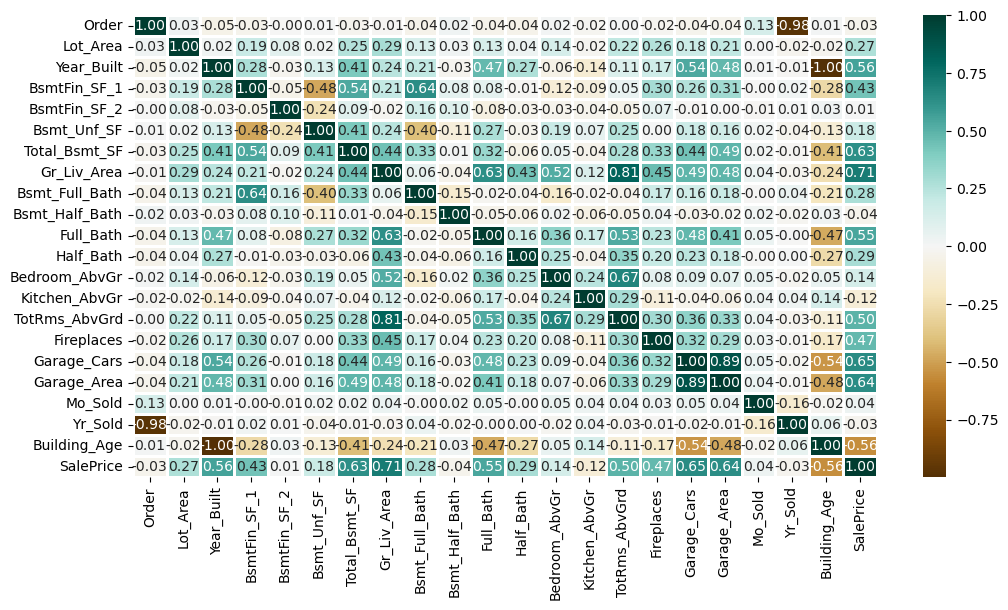

In [86]:
#data preprocessing

obj = (ds.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (ds.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (ds.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

#Exploratory analysis using heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(ds.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)





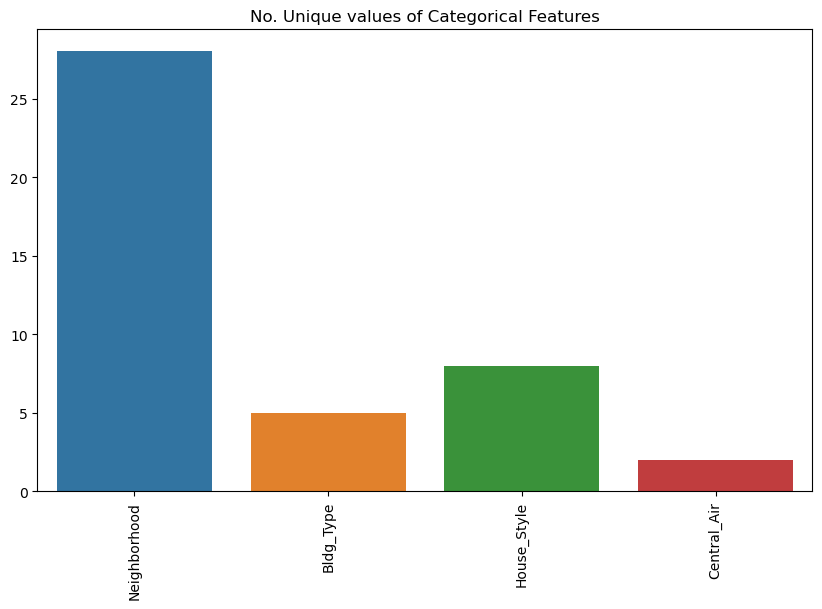

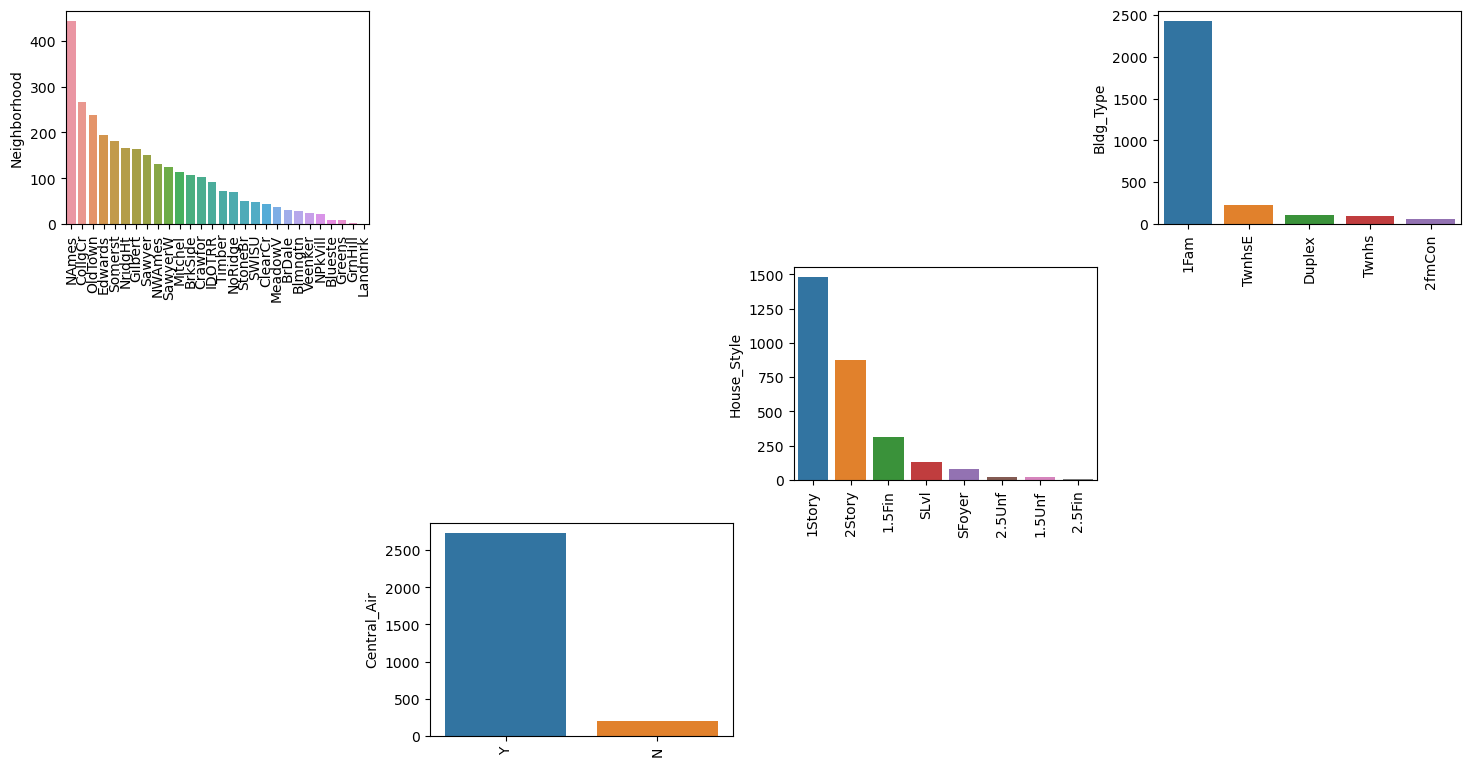

In [87]:
# To analyse categorical features drawing bar graphs
unique_values = []
for col in object_cols:
    unique_values.append(ds[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = ds[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 3

In [88]:
#Data cleaning- Removing unwanted coulumns
ds2=ds.drop(['Order','Year_Built','Central_Air','Bsmt_Full_Bath',
                        'Bsmt_Half_Bath','Bedroom_AbvGr','Kitchen_AbvGr','TotRms_AbvGrd','Fireplaces','Garage_Cars','Mo_Sold','Yr_Sold'],axis='columns')
ds2


#Replacing salesprice empty values with there mean values
ds2['SalePrice'] = ds2['SalePrice'].fillna(ds2['SalePrice'].mean())

ds3=ds2.dropna()

ds3

ds3.columns

ds3['Neighborhood'].value_counts()

### 

#checking if null still exists
ds3.isnull().sum()

ds3.columns

Index(['Lot_Area', 'Neighborhood', 'Bldg_Type', 'House_Style', 'BsmtFin_SF_1',
       'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Gr_Liv_Area',
       'Full_Bath', 'Half_Bath', 'Garage_Area', 'Building_Age', 'SalePrice'],
      dtype='object')

In [4]:
ds3.columns

Index(['Lot_Area', 'Neighborhood', 'Bldg_Type', 'House_Style', 'BsmtFin_SF_1',
       'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Gr_Liv_Area',
       'Full_Bath', 'Half_Bath', 'Garage_Area', 'Building_Age', 'SalePrice'],
      dtype='object')

In [5]:
ds3.head()

,Lot_Area,Neighborhood,Bldg_Type,House_Style,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Garage_Area,Building_Age,SalePrice
0,31770,NAmes,1Fam,1Story,639.0,0.0,441.0,1080.0,1656,1,0,528.0,50,215000
1,11622,NAmes,1Fam,1Story,468.0,144.0,270.0,882.0,896,1,0,730.0,49,105000
2,14267,NAmes,1Fam,1Story,923.0,0.0,406.0,1329.0,1329,1,1,312.0,52,172000
3,11160,NAmes,1Fam,1Story,1065.0,0.0,1045.0,2110.0,2110,2,1,522.0,42,244000
4,13830,Gilbert,1Fam,2Story,791.0,0.0,137.0,928.0,1629,2,1,482.0,13,189900


In [6]:
ds3.shape

(2928, 14)

In [7]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds3['Neighborhood'] = le.fit_transform(ds3['Neighborhood'])
ds3.head()

,Lot_Area,Neighborhood,Bldg_Type,House_Style,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Garage_Area,Building_Age,SalePrice
0,31770,15,1Fam,1Story,639.0,0.0,441.0,1080.0,1656,1,0,528.0,50,215000
1,11622,15,1Fam,1Story,468.0,144.0,270.0,882.0,896,1,0,730.0,49,105000
2,14267,15,1Fam,1Story,923.0,0.0,406.0,1329.0,1329,1,1,312.0,52,172000
3,11160,15,1Fam,1Story,1065.0,0.0,1045.0,2110.0,2110,2,1,522.0,42,244000
4,13830,8,1Fam,2Story,791.0,0.0,137.0,928.0,1629,2,1,482.0,13,189900


In [8]:
ds3['Bldg_Type'].value_counts()

1Fam      2423
TwnhsE     233
Duplex     109
Twnhs      101
2fmCon      62
Name: Bldg_Type, dtype: int64

In [9]:
house_style = pd.get_dummies(ds3['House_Style'], drop_first=True)

In [10]:
bldg_type = pd.get_dummies(ds3['Bldg_Type'], drop_first=True)

In [11]:
ds3 = pd.concat([ds3, house_style], axis = 1)
ds3.head()

,Lot_Area,Neighborhood,Bldg_Type,House_Style,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Gr_Liv_Area,Full_Bath,...,Garage_Area,Building_Age,SalePrice,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,31770,15,1Fam,1Story,639.0,0.0,441.0,1080.0,1656,1,...,528.0,50,215000,0,1,0,0,0,0,0
1,11622,15,1Fam,1Story,468.0,144.0,270.0,882.0,896,1,...,730.0,49,105000,0,1,0,0,0,0,0
2,14267,15,1Fam,1Story,923.0,0.0,406.0,1329.0,1329,1,...,312.0,52,172000,0,1,0,0,0,0,0
3,11160,15,1Fam,1Story,1065.0,0.0,1045.0,2110.0,2110,2,...,522.0,42,244000,0,1,0,0,0,0,0
4,13830,8,1Fam,2Story,791.0,0.0,137.0,928.0,1629,2,...,482.0,13,189900,0,0,0,0,1,0,0


In [12]:
ds3 = pd.concat([ds3, bldg_type], axis = 1)
ds3.head()

,Lot_Area,Neighborhood,Bldg_Type,House_Style,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Gr_Liv_Area,Full_Bath,...,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,2fmCon,Duplex,Twnhs,TwnhsE
0,31770,15,1Fam,1Story,639.0,0.0,441.0,1080.0,1656,1,...,1,0,0,0,0,0,0,0,0,0
1,11622,15,1Fam,1Story,468.0,144.0,270.0,882.0,896,1,...,1,0,0,0,0,0,0,0,0,0
2,14267,15,1Fam,1Story,923.0,0.0,406.0,1329.0,1329,1,...,1,0,0,0,0,0,0,0,0,0
3,11160,15,1Fam,1Story,1065.0,0.0,1045.0,2110.0,2110,2,...,1,0,0,0,0,0,0,0,0,0
4,13830,8,1Fam,2Story,791.0,0.0,137.0,928.0,1629,2,...,0,0,0,1,0,0,0,0,0,0


In [13]:
ds3.columns

Index(['Lot_Area', 'Neighborhood', 'Bldg_Type', 'House_Style', 'BsmtFin_SF_1',
       'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Gr_Liv_Area',
       'Full_Bath', 'Half_Bath', 'Garage_Area', 'Building_Age', 'SalePrice',
       '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl',
       '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'],
      dtype='object')

In [14]:
ds3 = ds3.drop(['Bldg_Type','House_Style'], axis = 1) 

In [15]:
ds3.shape

(2928, 23)

In [16]:
ds3.head()

,Lot_Area,Neighborhood,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Garage_Area,...,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,2fmCon,Duplex,Twnhs,TwnhsE
0,31770,15,639.0,0.0,441.0,1080.0,1656,1,0,528.0,...,1,0,0,0,0,0,0,0,0,0
1,11622,15,468.0,144.0,270.0,882.0,896,1,0,730.0,...,1,0,0,0,0,0,0,0,0,0
2,14267,15,923.0,0.0,406.0,1329.0,1329,1,1,312.0,...,1,0,0,0,0,0,0,0,0,0
3,11160,15,1065.0,0.0,1045.0,2110.0,2110,2,1,522.0,...,1,0,0,0,0,0,0,0,0,0
4,13830,8,791.0,0.0,137.0,928.0,1629,2,1,482.0,...,0,0,0,1,0,0,0,0,0,0


In [17]:
ds_normal = ds3[['Lot_Area','BsmtFin_SF_1','BsmtFin_SF_2','Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Gr_Liv_Area']]

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ds_normal = ss.fit_transform(ds_normal)
ds_normal = pd.DataFrame(ds_normal, columns= ['lot_area','bsmtFin_SF_1','bsmtFin_SF_2','bsmt_Unf_SF', 'total_Bsmt_SF', 'gr_Liv_Area'])

In [19]:
ds4 = pd.concat([ds3, ds_normal], axis = 1)

In [20]:
ds4 = ds4.drop(['Lot_Area','BsmtFin_SF_1','BsmtFin_SF_2','Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Gr_Liv_Area'], axis = 1)

In [21]:
ds4.head()

,Neighborhood,Full_Bath,Half_Bath,Garage_Area,Building_Age,SalePrice,1.5Unf,1Story,2.5Fin,2.5Unf,...,2fmCon,Duplex,Twnhs,TwnhsE,lot_area,bsmtFin_SF_1,bsmtFin_SF_2,bsmt_Unf_SF,total_Bsmt_SF,gr_Liv_Area
0,15.0,1.0,0.0,528.0,50.0,215000.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.743357,0.431107,-0.294027,-0.269295,0.064275,0.309071
1,15.0,1.0,0.0,730.0,49.0,105000.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.186814,0.055766,0.557208,-0.658400,-0.385111,-1.194582
2,15.0,1.0,1.0,312.0,52.0,172000.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.522433,1.054479,-0.294027,-0.348937,0.629413,-0.337896
3,15.0,2.0,1.0,522.0,42.0,244000.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.128191,1.366165,-0.294027,1.105087,2.401993,1.207306
4,8.0,2.0,1.0,482.0,13.0,189900.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.466983,0.764742,-0.294027,-0.961037,-0.280708,0.255652


In [24]:
ds4 = ds4.fillna(0)

In [25]:
ds4.isnull().sum()

Neighborhood     0
Full_Bath        0
Half_Bath        0
Garage_Area      0
Building_Age     0
SalePrice        0
1.5Unf           0
1Story           0
2.5Fin           0
2.5Unf           0
2Story           0
SFoyer           0
SLvl             0
2fmCon           0
Duplex           0
Twnhs            0
TwnhsE           0
lot_area         0
bsmtFin_SF_1     0
bsmtFin_SF_2     0
bsmt_Unf_SF      0
total_Bsmt_SF    0
gr_Liv_Area      0
dtype: int64

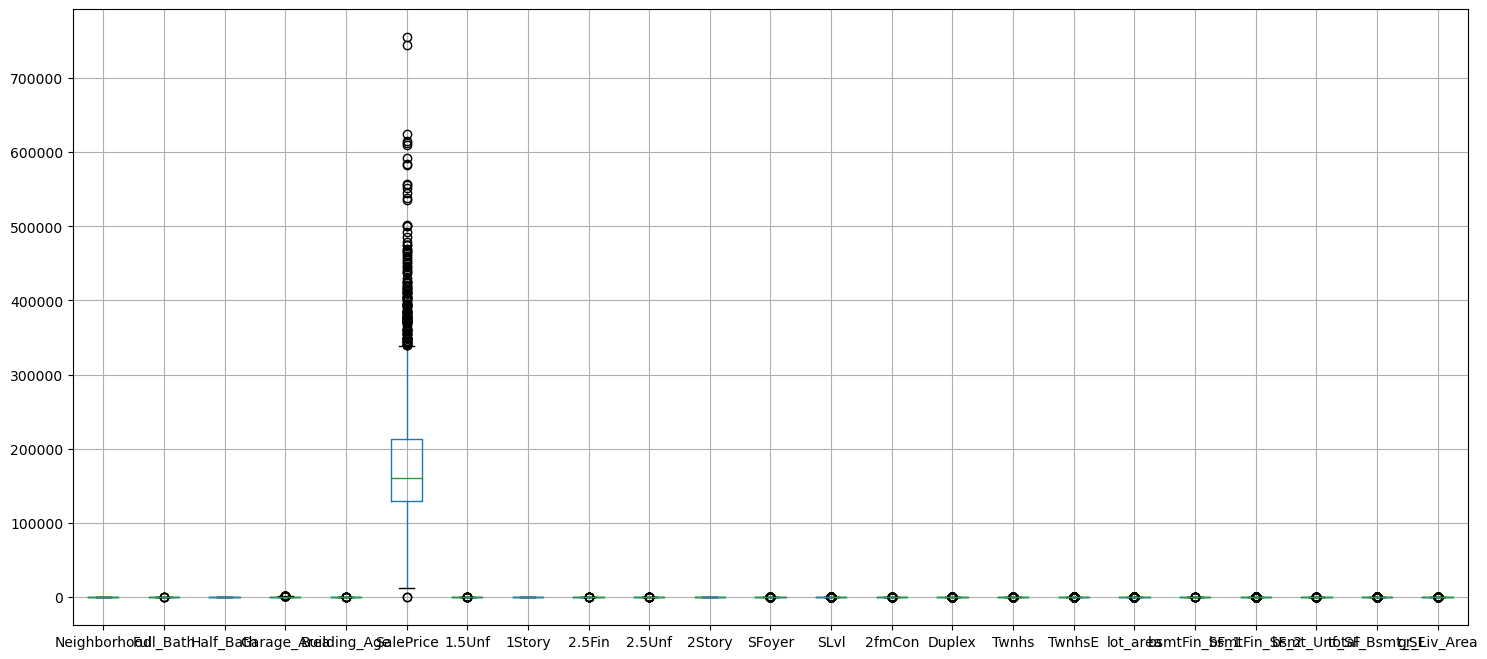

,Neighborhood,Full_Bath,Half_Bath,Garage_Area,Building_Age,SalePrice,1.5Unf,1Story,2.5Fin,2.5Unf,...,2fmCon,Duplex,Twnhs,TwnhsE,lot_area,bsmtFin_SF_1,bsmtFin_SF_2,bsmt_Unf_SF,total_Bsmt_SF,gr_Liv_Area
2,15.0,1.0,1.0,312.0,52.0,172000.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.522433,1.054479,-0.294027,-0.348937,0.629413,-0.337896
4,8.0,2.0,1.0,482.0,13.0,189900.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.466983,0.764742,-0.294027,-0.961037,-0.280708,0.255652
5,8.0,2.0,1.0,470.0,12.0,195500.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.021791,0.349893,-0.294027,-0.535525,-0.285248,0.206189
9,8.0,2.0,1.0,442.0,11.0,189000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.336220,-0.971481,-0.294027,0.989038,-0.130913,0.601888
10,8.0,2.0,1.0,440.0,17.0,175900.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.018999,-0.971481,-0.294027,0.463405,-0.655197,0.307093


In [83]:
#outlier analysis
plt.figure(figsize=(18,8))
ds4.boxplot()
plt.show()
# Deletion of outliers
q1 = ds4.quantile(0.25)
q3 = ds4.quantile(0.75)

iqr = q3 - q1

ds4 = ds4[~((ds4<(q1 - 1.5*iqr))|(ds4>(q3 + 1.5*iqr))).any(axis = 1)]
ds4.head()

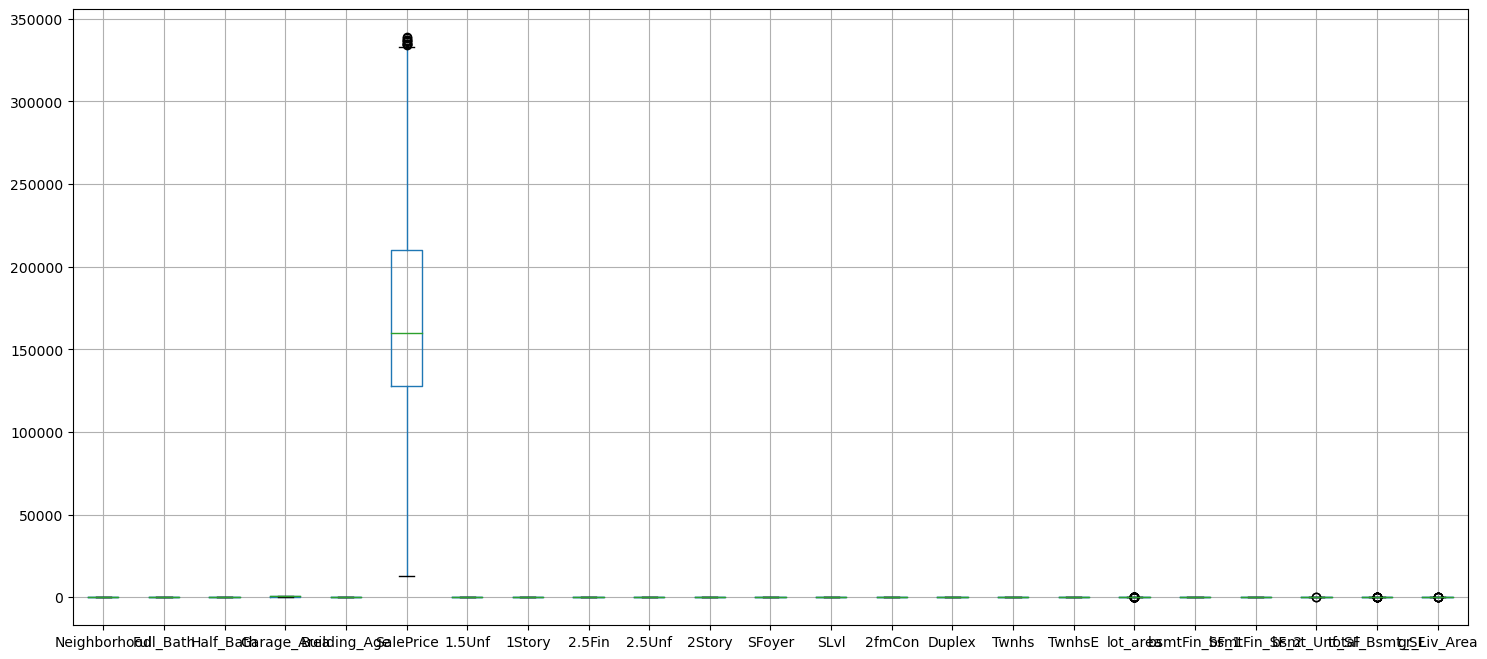

In [85]:
#plot after deleting outliers
plt.figure(figsize=(18,8))
ds4.boxplot()
plt.show()

In [73]:
#Testing and training of dataset after deletion of outliers

y = ds4['SalePrice']
X = ds4.drop(['SalePrice'], axis = 1)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [75]:
#Using SVM model to find Mean error
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
Y_pred = model_SVR.predict(X_test)
 
print(mean_absolute_percentage_error(y_test, Y_pred))

0.3253581752116363


In [76]:
# Using Random forest to find Mean error
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train)
Y_pred = model_RFR.predict(X_test)
 
mean_absolute_percentage_error(y_test, Y_pred)

0.15642624995411744

In [77]:
ds4.columns

Index(['Neighborhood', 'Full_Bath', 'Half_Bath', 'Garage_Area', 'Building_Age',
       'SalePrice', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer',
       'SLvl', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE', 'lot_area',
       'bsmtFin_SF_1', 'bsmtFin_SF_2', 'bsmt_Unf_SF', 'total_Bsmt_SF',
       'gr_Liv_Area'],
      dtype='object')

In [78]:
#Considering the Random forest model as error is less compared to SVM
def predict_price(Neighborhood,lot_Area,total_Bsmt_SF,Full_Bath,Half_Bath,Building_Age,Garage_Area,gr_Liv_Area):    
    loc_index = np.where(X.columns==Neighborhood)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = lot_Area
    x[1] = total_Bsmt_SF
    x[2] = Full_Bath
    x[3] = Half_Bath
    x[4] = Building_Age
    x[5] = Garage_Area
    x[6] = gr_Liv_Area
    if loc_index >= 0:
        x[loc_index] = 1

    return model_RFR.predict([x])[0]

In [79]:
#Predicting sales price by giving all dependencies.
predict_price('2Story',200, 500, 1,1,30,100,1000)

143495.0

In [80]:
#Predicting sales price by changing Neighborhood and lot_area
predict_price('1Story',300, 500, 1,1,30,100,1000)

137790.0

In [81]:
#Predicting sales price by changing Neighborhood, total_Bsmt_SF,Full_Bath and Building age
predict_price('2.5Fin',300, 400, 2,1,10,100,1000)

171004.4

In [82]:
#Predicting sales price by changing all dependencies
predict_price('1Story',300, 400, 2,1,20,100,2000)

172339.4